# Assignment 2 - Mehek K
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

Overview of data: 

a. cast.csv
Records: 334,824
Columns:
title: Name of the movie
year: Year the movie was released
name: Name of the actor/actress
type: Either "actor" or "actress"
character: Role played
n: Ranking of the cast (1 = lead role)
Use: Useful for analyzing cast sizes, roles over time, lead actors, and character trends.

b. release_dates.csv
Records: 152,731 
Columns:
title: Movie title
year: Release year
date: Full release date (can be parsed to find month/day/week trends)
Use: Useful for analyzing seasonal or weekday trends in movie releases.

c. titles.csv
Records: 230,006
Columns:
title: Movie title
year: Release year
kind: Type of content (e.g., "movie", "tv movie", "short", etc.)
Use: Useful for counting movies per year/decade and identifying specific films by title and type.


### 2. How many movies have the title North by Northwest

In [9]:
import pandas as pd

titles_df = pd.read_csv("/Users/mehekkumar/Desktop/MBA/ADV. PROG/Archive/titles.csv")

nbnw_count = titles_df[titles_df['title'] == 'North by Northwest'].shape[0]
nbnw_count

1

### 3. How many version of Hamlet are there, when was the first made? the last?

In [22]:
hamlet_valid = titles_df[(titles_df['title'] == 'Hamlet') & (titles_df['year'] <= 2025)] ##titles valid before 2025

num_hamlets_valid = hamlet_valid.shape[0] ##count number of titles with hamlet

first_hamlet_year_valid = hamlet_valid['year'].min() #first year
last_hamlet_year_valid = hamlet_valid['year'].max() # last year

hamlet_valid_sorted = hamlet_valid.sort_values(by='year')

num_hamlets_valid, first_hamlet_year_valid, last_hamlet_year_valid


(20, 1910, 2017)

There are 20 versions of Hamlet. 
First was made in 1910 and last in 2017.

### 4. List all the movies called Treasure Island from oldest to newest

In [25]:
treasure_island_df = titles_df[
    (titles_df['title'] == 'Treasure Island') & 
    (titles_df['year'] <= 2025)
]

treasure_island_sorted = treasure_island_df.sort_values(by='year')
treasure_island_sorted


,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [32]:
# Filter out invalid/future years
valid_titles = titles_df[titles_df['year'] <= 2025]

# Count how many titles were made in each specified year
count_1950 = valid_titles[valid_titles['year'] == 1950].shape[0]
count_1980 = valid_titles[valid_titles['year'] == 1980].shape[0]
count_2000 = valid_titles[valid_titles['year'] == 2000].shape[0]

# Display the counts
count_1950, count_1980, count_2000

(1109, 1750, 2568)

Number of movies in these years:
1950: 1109
1980:1750
2000:2568

- Film production has increased over time, nearly doubling from 1950 to 2000, reflecting industry growth and easier access to filmmaking tools.
- Technological advances and global interest in cinema likely contributed to the surge in movie production, especially around the 2000s.
- This upward trend highlights a shift toward mass content creation to meet rising global demand across various platforms.

### 6. How big was the cast of Metropolis


In [42]:

cast_df = pd.read_csv("/Users/mehekkumar/Desktop/MBA/ADV. PROG/Archive/cast.csv")  

metropolis_cast = cast_df[
    (cast_df['title'] == 'Metropolis') &
    (cast_df['year'] <= 2025)
]

metropolis_cast_size = metropolis_cast.shape[0]

metropolis_cast_size


33

The cast of Metropolis had 33 credited members.

### 7. How many roles for actors were there 1950's? 1990's

In [45]:

valid_cast = cast_df[(cast_df['year'] <= 2025) & (cast_df['type'] == 'actor')]

roles_1950s = valid_cast[(valid_cast['year'] >= 1950) & (valid_cast['year'] <= 1959)].shape[0]

roles_1990s = valid_cast[(valid_cast['year'] >= 1990) & (valid_cast['year'] <= 1999)].shape[0]

roles_1950s, roles_1990s


(153559, 245713)

- 1950: 153559
- 1990: 245713

### 8. How many roles for actors & actresses over time? Output should be a line graph

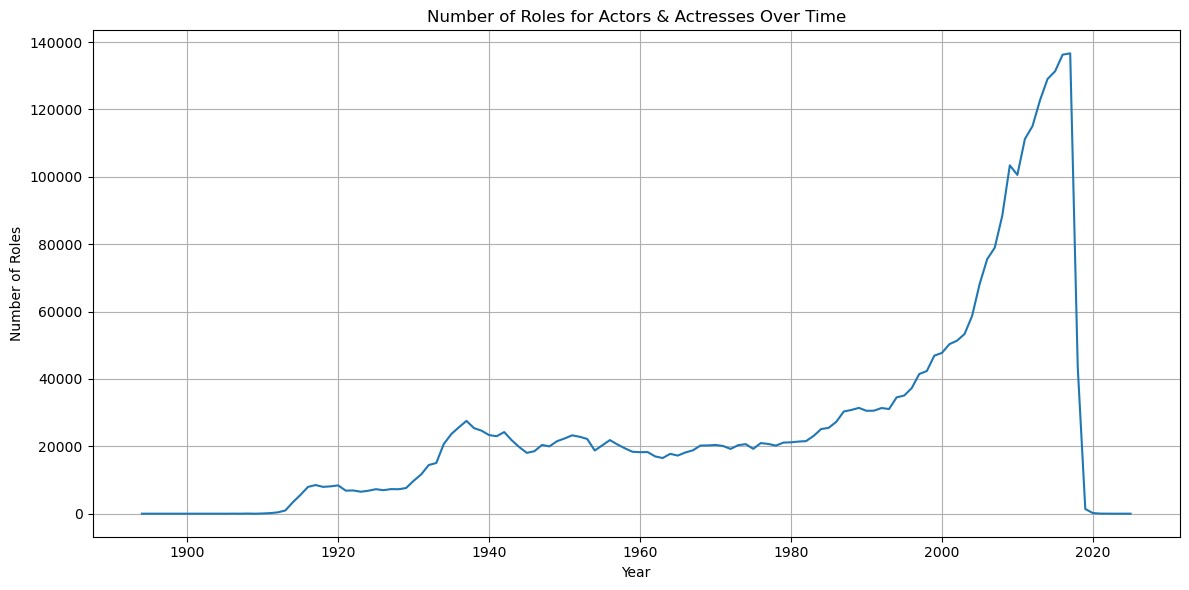

In [51]:
import matplotlib.pyplot as plt
valid_roles = cast_df[cast_df['year'] <= 2025]


roles_by_year = valid_roles.groupby('year').size()

plt.figure(figsize=(12, 6))
roles_by_year.plot(kind='line')
plt.title('Number of Roles for Actors & Actresses Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.grid(True)
plt.tight_layout()
plt.show()


### 9. How many "leading roles" were there in the 2000's?

In [57]:
leading_roles_2000s = cast_df[
    (cast_df['year'] >= 2000) &
    (cast_df['year'] <= 2009) &
    (cast_df['n'] == 1.0)
]

leading_roles_2000s_count = leading_roles_2000s.shape[0]
leading_roles_2000s_count

23593

There were 23593 leading roles in the 2000's

### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [60]:
no_rank_2000s = cast_df[
    (cast_df['year'] >= 2000) &
    (cast_df['year'] <= 2009) &
    (cast_df['n'].isna())
].shape[0]


no_rank_1950s = cast_df[
    (cast_df['year'] >= 1950) &
    (cast_df['year'] <= 1959) &
    (cast_df['n'].isna())
].shape[0]

no_rank_2000s, no_rank_1950s


(232037, 95406)

In both the 1950s and 2000s, a significant number of roles had no ranking (n value), with 95,406 in the 1950s and a much larger 232,037 in the 2000s. This suggests that even in more recent years, many roles—especially minor or background ones—are unranked, highlighting that cast ranking data remains incomplete and should be interpreted with caution.

### 11. Plot the number of films made in each decade

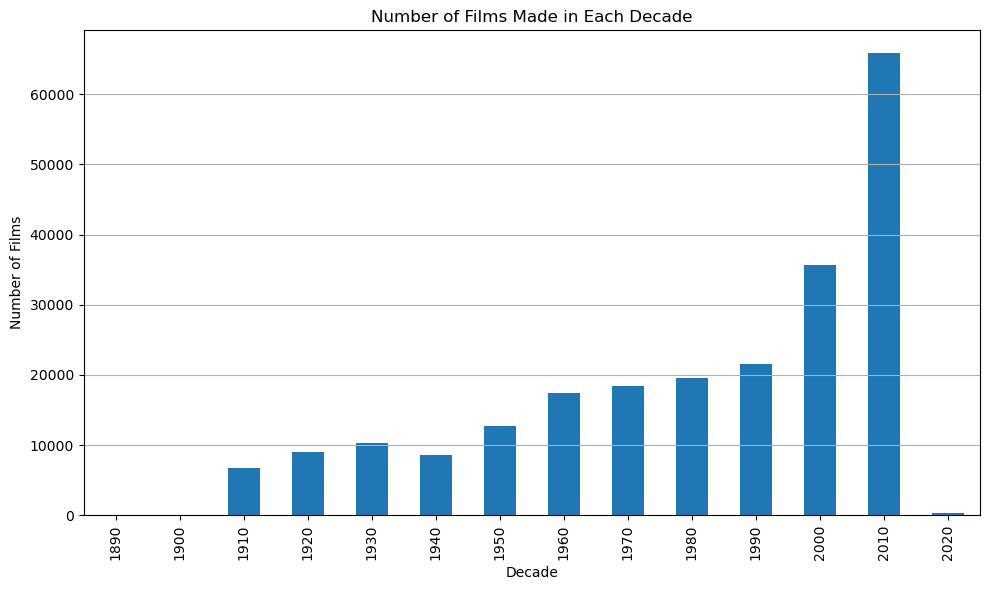

In [65]:
titles_df = titles_df[titles_df['year'] <= 2025]

titles_df['decade'] = (titles_df['year'] // 10) * 10

films_by_decade = titles_df.groupby('decade').size()

plt.figure(figsize=(10, 6))
films_by_decade.plot(kind='bar')
plt.title('Number of Films Made in Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


### 12. Plot the number of films with a Rustler character over time

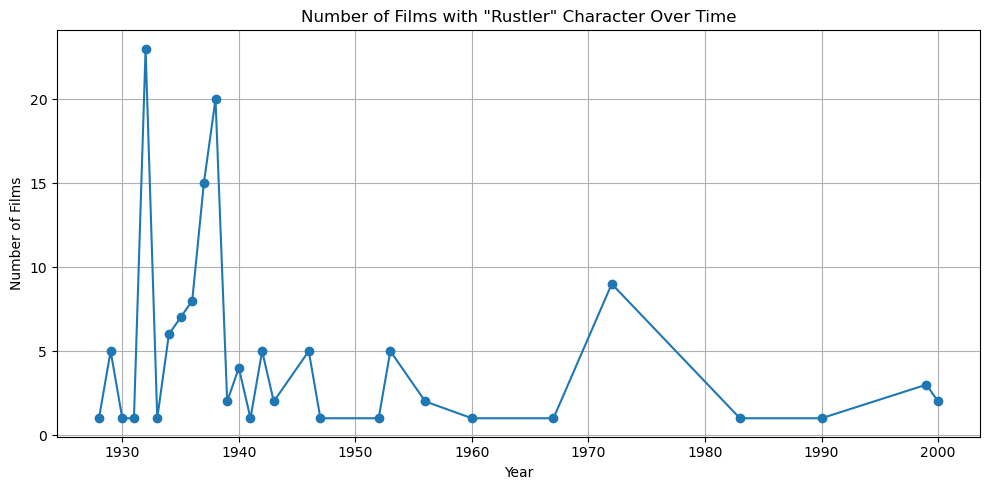

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


cast_df = pd.read_csv("/Users/mehekkumar/Desktop/MBA/ADV. PROG/Archive/cast.csv")


rustlers = cast_df[
    (cast_df['character'] == 'Rustler') &
    (cast_df['year'] <= 2025)
]


rustlers_by_year = rustlers.groupby('year').size()

plt.figure(figsize=(10, 5))
rustlers_by_year.plot(kind='line', marker='o')
plt.title('Number of Films with "Rustler" Character Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.grid(True)
plt.tight_layout()
plt.show()


### 13. What are the top ten character names of all time?

In [14]:
top_characters = cast_df['character'].dropna()
top_characters = top_characters[top_characters.str.strip() != '']
top_10_characters = top_characters.value_counts().head(10)

top_10_characters

character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64

- If you exclude himself which is not a character name essentially (but not sure if we should exclude it) then Dancer would be first

### 14. Which actor appeared in the most films in the 1990's decade?

In [29]:
cast_90s = cast_df[
    (cast_df['year'] >= 1990) &
    (cast_df['year'] <= 1999)
]

top_star_90s = cast_90s['name'].value_counts().head(1)
top_star_90s


name
Shakti Kapoor    143
Name: count, dtype: int64

### 15. What are the top 10 roles that start with Science?

In [31]:
science_roles = cast_df[
    cast_df['character'].fillna('').str.startswith("Science", na=False)
]

top_science_roles = science_roles['character'].value_counts().head(10)

top_science_roles

character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64

### 16. What film has the largest cast

In [40]:

cast_sizes = cast_df.groupby(['title', 'year']).size()

largest_cast_film = cast_sizes.sort_values(ascending=False).head(1)

largest_cast_film

title                        year
Around the World in 80 Days  1956    1299
dtype: int64

In 1956, Around the world in 80 days has had the largest cast of 1299 people

### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [42]:
cast_df = cast_df[cast_df['year'] <= 2025]

cast_sizes = cast_df.groupby(['title', 'year']).size()

cast_stats = cast_sizes.describe()
cast_stats

count    182496.000000
mean         18.865581
std          21.241273
min           1.000000
25%           6.000000
50%          13.000000
75%          24.000000
max        1299.000000
dtype: float64

Most films have modest cast sizes, with a median of 13 and an average of about 19 cast members. However, some productions have exceptionally large casts — with the maximum reaching 1,299 — which slightly skews the mean upward. The wide standard deviation also reflects a broad variation in cast sizes across films.

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [45]:
natalie = cast_df[
    (cast_df['name'] == 'Natalie Portman') &
    (cast_df['year'] <= 2025)
]

natalie_film_counts = natalie.groupby('year').size()

natalie_film_counts

year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
dtype: int64

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [49]:
natalie_top_roles = cast_df[
    (cast_df['name'] == 'Natalie Portman') &
    (cast_df['n'].isin([1.0, 2.0])) &
    (cast_df['year'] <= 2025)
]

natalie_top_roles_by_year = natalie_top_roles.groupby('year').size()

natalie_top_roles_by_year

year
1999    1
2000    1
2002    1
2005    3
2006    2
2007    1
2008    1
2009    1
2010    2
2011    2
2013    1
2015    2
2016    2
dtype: int64

### 20. Determine how many roles for actor or actress by decade. Plot the output 

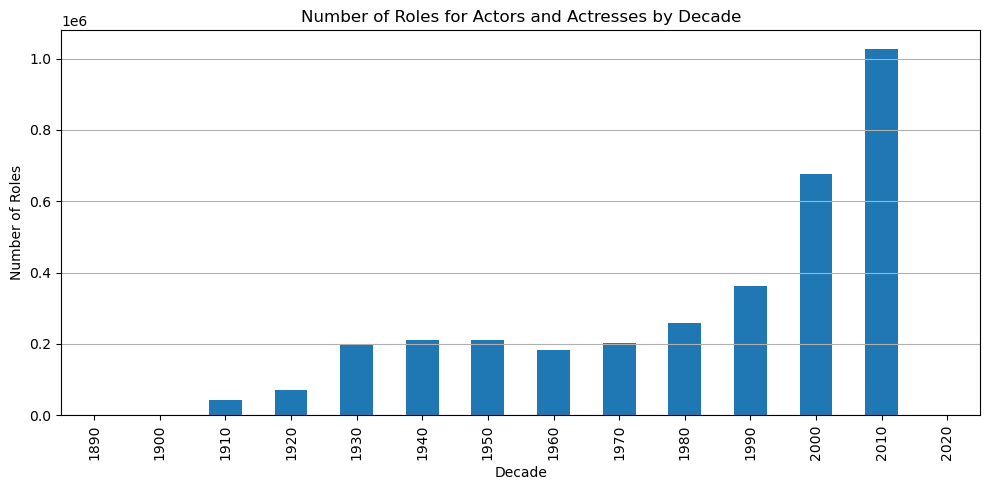

In [51]:
valid_cast = cast_df[
    (cast_df['type'].isin(['actor', 'actress']))
]

valid_cast['decade'] = (valid_cast['year'] // 10) * 10

roles_by_decade = valid_cast.groupby('decade').size()

plt.figure(figsize=(10, 5))
roles_by_decade.plot(kind='bar')
plt.title('Number of Roles for Actors and Actresses by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Roles')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [55]:
release_df = pd.read_csv("/Users/mehekkumar/Desktop/MBA/ADV. PROG/Archive/release_dates.csv")
release_df['date'] = pd.to_datetime(release_df['date'], errors='coerce')


release_df = release_df.dropna(subset=['date'])


release_df['weekday'] = release_df['date'].dt.day_name()
release_df['month'] = release_df['date'].dt.month_name()


pivot = pd.pivot_table(release_df, values='title', index='weekday', columns='month', aggfunc='count')

pivot

month,April,August,December,February,January,July,June,March,May,November,October,September
weekday,,,,,,,,,,,,
Friday,13559,13430,13020,13833,13734,11635,11997,15268,13198,14084,14893,14523
Monday,3168,2844,3240,3138,3699,2267,2337,3383,3050,3372,3551,3161
Saturday,2868,2277,3357,2395,2925,2291,2409,2742,2270,2546,2700,2551
Sunday,1358,1138,1813,1277,1822,894,1031,1228,1165,1342,1423,1332
Thursday,10625,9931,10666,10356,10746,8947,9469,11844,10100,10859,11490,10713
Tuesday,1446,1121,1903,1190,1823,1144,1179,1313,1377,1415,1542,1309
Wednesday,4650,4270,5097,4118,4663,4243,4282,4479,4289,4582,4605,4161


- Friday is usually the most common release day, aligning with global cinema trends — studios often release big titles just before the weekend.

- Summer months (like June, July) and holiday months (like December) usually have higher releases due to vacation periods and higher audience turnout.

- Midweek and early-week releases (Monday–Wednesday) are rare, likely reserved for niche or festival releases.

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

<Figure size 1400x600 with 0 Axes>

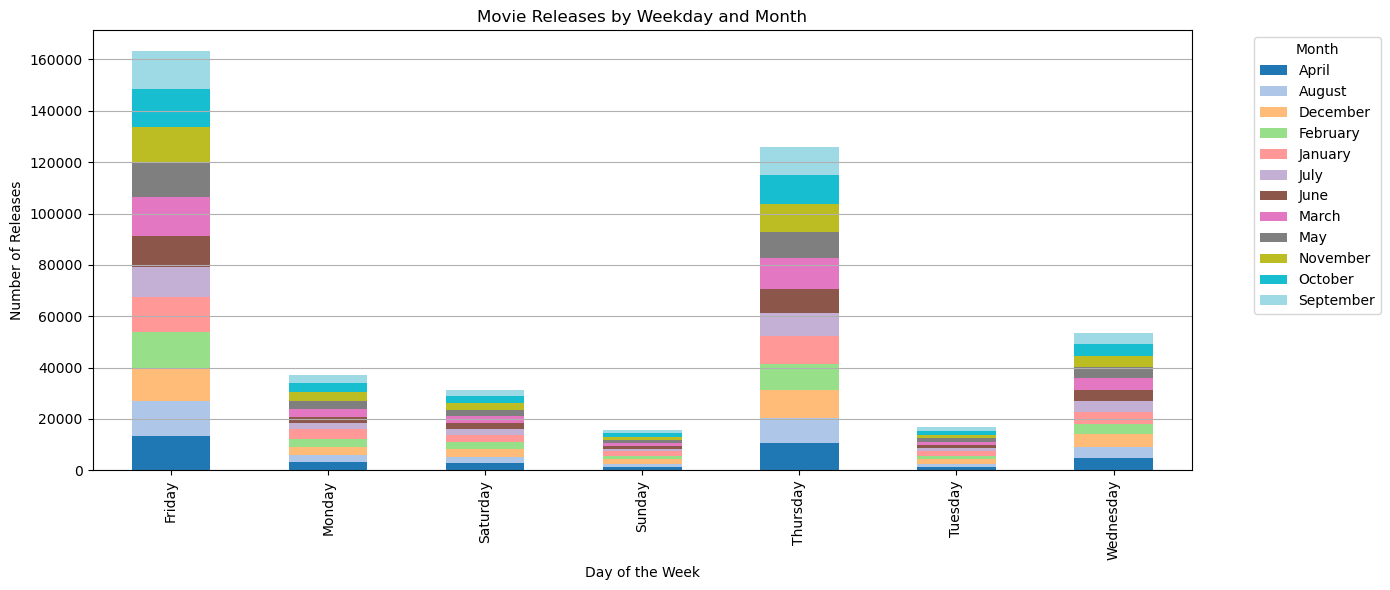

In [58]:
import matplotlib.pyplot as plt

# Fill NaNs with 0 for plotting
pivot_filled = pivot.fillna(0)

plt.figure(figsize=(14, 6))
pivot_filled.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 6))
plt.title('Movie Releases by Weekday and Month')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Releases')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

<Figure size 1400x600 with 0 Axes>

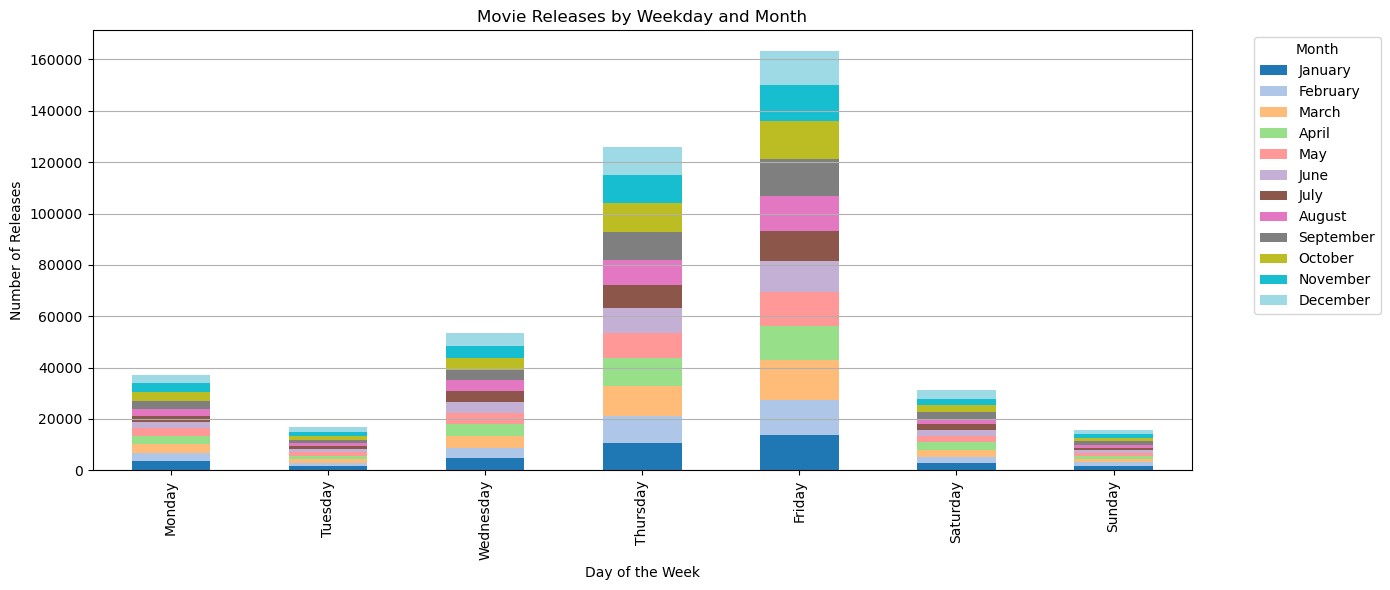

In [60]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Reorder pivot table for weekdays
pivot_ordered = pivot.reindex(weekday_order)

# Reorder columns for months
pivot_ordered = pivot_ordered[month_order]

plt.figure(figsize=(14, 6))
pivot_ordered.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title('Movie Releases by Weekday and Month')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Releases')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 23. What films did actors in Star Wars go on to appear in? 

In [62]:
star_wars_cast = cast_df[cast_df['title'].str.contains("Star Wars", case=False, na=False)]
star_wars_actors = star_wars_cast['name'].unique()

other_movies = cast_df[
    (cast_df['name'].isin(star_wars_actors)) &
    (~cast_df['title'].str.contains("Star Wars", case=False, na=False))
]

other_movies_sorted = other_movies[['name', 'title', 'year']].sort_values(by='name')

other_movies_sorted.head(20)

,name,title,year
1076732,Aaron (IV) Kennedy,Run All Night,2015
1076731,Aaron (IV) Kennedy,One Square Mile,2014
124861,Adam Bareham,Wilt,1990
572283,Adam Driver,Not Waving But Drowning,2012
572274,Adam Driver,Bluebird,2013
572275,Adam Driver,Frances Ha,2012
572276,Adam Driver,Gayby,2012
572277,Adam Driver,Hungry Hearts,2014
572278,Adam Driver,Inside Llewyn Davis,2013
572279,Adam Driver,J. Edgar,2011


These 3 actors mainly